In [1]:
# import gradio as gr
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
# imagepath = './images/simple_flowers.jpg'
# imagepath = './images/rocky_coast.jpg'
# imagepath = './images/purple_flower.jpg'
imagepath = './images/simple_dots.png'

In [3]:
im = cv2.imread(imagepath)

In [4]:
type(im)

numpy.ndarray

In [5]:
np.shape(im)

(640, 640, 3)

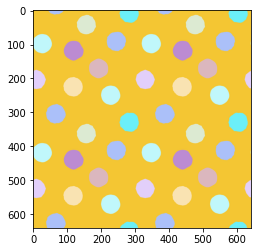

In [6]:
plt.imshow(im)

In [7]:
np.shape(im)

(640, 640, 3)

In [8]:
image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [9]:
np.shape(image)

(640, 640, 3)

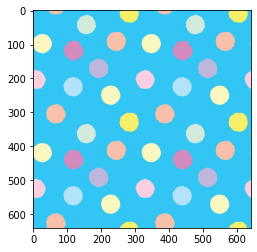

In [10]:
plt.imshow(image)

In [11]:
np.shape(image)[0]

640

In [12]:
def resize_image(image):
    x = np.shape(image)[0]
    y = np.shape(image)[1]
    z = np.shape(image)[2]

    if (x <= 800) and (y <= 800):
        return image

    new_x = x
    new_y = y
    divider_x = x//4
    divider_y = y//4

    while (new_x > 800) or (new_y > 800):
        new_x = new_x//divider_x
        new_y = new_y//divider_y

    res = cv2.resize(image, dsize=(x//2, y//2), interpolation=cv2.INTER_LINEAR)
    return res

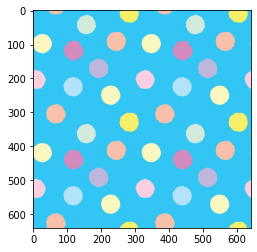

In [13]:
plt.imshow(image)

In [14]:
print(np.shape(image))
x = np.shape(image)[0]
y = np.shape(image)[1]
print(x*2, y*2)
test_res = cv2.resize(image, dsize=(x*3, y*3), interpolation=cv2.INTER_LINEAR)
np.shape(test_res)
res = resize_image(image)
np.shape(res)

(640, 640, 3)
1280 1280


(640, 640, 3)

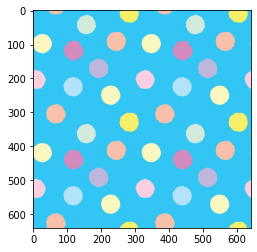

In [15]:
plt.imshow(res)

In [ ]:
np.shape(res)

In [ ]:
plt.imshow(res)

In [ ]:
x//2

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
np.shape(pixel_vals)

In [ ]:
# Convert to float type
pixel_vals = np.float32(pixel_vals)

In [ ]:
np.shape(pixel_vals)

In [ ]:
# from sklearn.cluster import KMeans

In [ ]:
# the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

In [ ]:
centers

In [ ]:
centers[:,0]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import cv2
im = cv2.imread(imagepath)
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b, c=labels)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], s=50, c='r', marker="o", label='cluster centers')
plt.show()

In [ ]:
fig